<a href="https://colab.research.google.com/github/ShubhamKasture67/AITA-LAB-1/blob/main/AITA_LAB_5_3-INPUT_X-OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: want a code to make a 3 input X-OR gate with neural network with Multi layer perseptron by back propogation

import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Output dataset
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights_input_hidden = 2 * np.random.random((3, 4)) - 1
weights_hidden_output = 2 * np.random.random((4, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_input = np.dot(X, weights_input_hidden)
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
  output_layer_output = sigmoid(output_layer_input)

  # Calculate the error
  error = y - output_layer_output

  # Backpropagation
  d_output = error * sigmoid_derivative(output_layer_output)
  error_hidden_layer = d_output.dot(weights_hidden_output.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights
  weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
  weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Test the trained network
print("Output after training:")
print(output_layer_output)


Output after training:
[[0.11295191]
 [0.9300948 ]
 [0.93821528]
 [0.01553242]
 [0.93223839]
 [0.033929  ]
 [0.03698412]
 [0.99742507]]


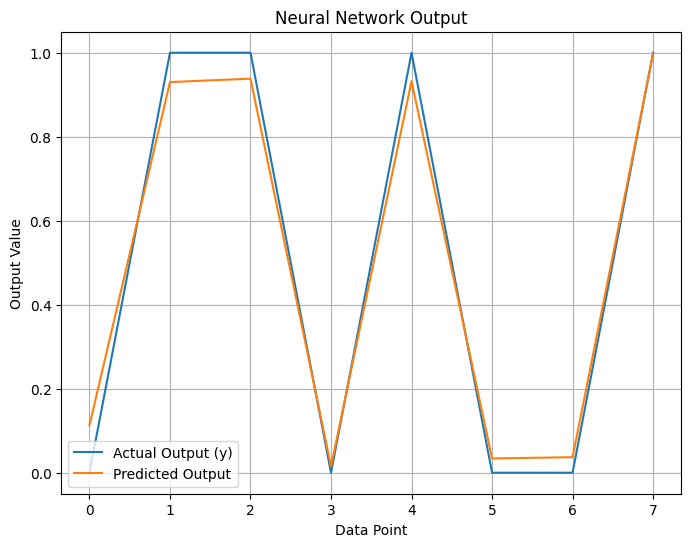

In [2]:
# prompt: Give me a visual graph for the above output

import matplotlib.pyplot as plt

# Assuming output_layer_output is a numpy array with the predicted values
# We'll plot the predicted values against the actual target values (y)

plt.figure(figsize=(8, 6))
plt.plot(y, label='Actual Output (y)')
plt.plot(output_layer_output, label='Predicted Output')
plt.xlabel('Data Point')
plt.ylabel('Output Value')
plt.title('Neural Network Output')
plt.legend()
plt.grid(True)
plt.show()


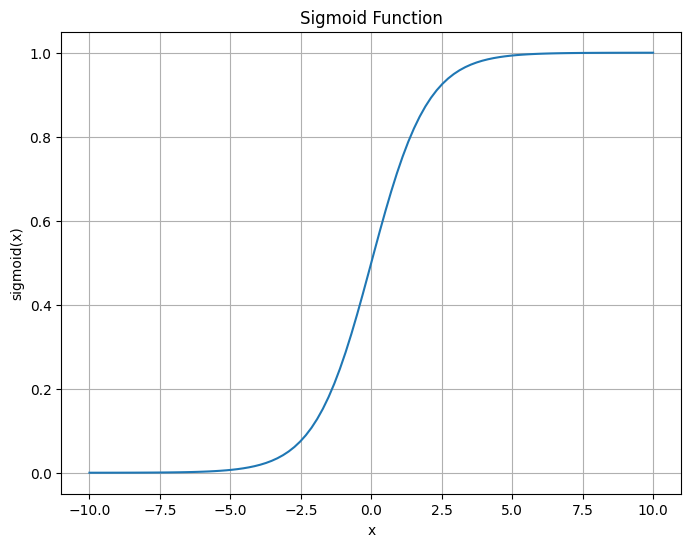

In [4]:
# prompt: now give me the code for sigmoid function graph for the above output

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Generate x values for the sigmoid function
x = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


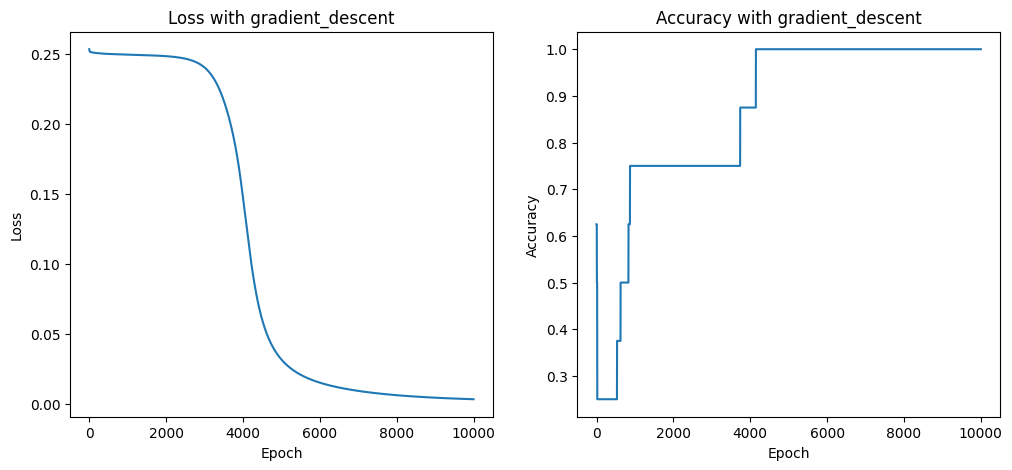

Output after training with gradient_descent:
[[0.10911805]
 [0.93555851]
 [0.93153016]
 [0.0349204 ]
 [0.93980351]
 [0.03509058]
 [0.02191833]
 [0.99441663]]


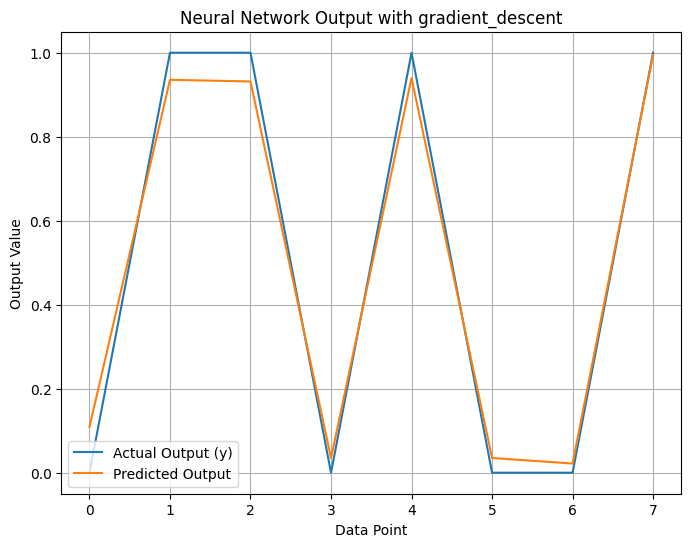

In [5]:
# prompt: now implement the above using different optimizers with their accuracy and loss graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Output dataset
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights_input_hidden = 2 * np.random.random((3, 4)) - 1
weights_hidden_output = 2 * np.random.random((4, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Function to calculate mean squared error
def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Function to train the network with a specific optimizer
def train_network(optimizer, epochs, learning_rate):
  losses = []
  accuracies = []
  weights_input_hidden = 2 * np.random.random((3, 4)) - 1
  weights_hidden_output = 2 * np.random.random((4, 1)) - 1
  for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights using the specified optimizer
    if optimizer == 'gradient_descent':
      weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
      weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    elif optimizer == 'momentum':
      # Implement momentum optimizer here
      pass
    elif optimizer == 'adam':
      # Implement Adam optimizer here
      pass

    # Calculate and store loss and accuracy
    loss = mse(y, output_layer_output)
    losses.append(loss)
    accuracy = np.mean((output_layer_output > 0.5) == y)
    accuracies.append(accuracy)

  return losses, accuracies, output_layer_output

# Train with different optimizers
optimizers = ['gradient_descent'] # Add 'momentum', 'adam' when implemented
for optimizer in optimizers:
  losses, accuracies, output_layer_output = train_network(optimizer, epochs, learning_rate)

  # Plot loss and accuracy
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Loss with {optimizer}')

  plt.subplot(1, 2, 2)
  plt.plot(accuracies)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy with {optimizer}')

  plt.show()

  print(f"Output after training with {optimizer}:")
  print(output_layer_output)

  # Plot predicted vs actual output
  plt.figure(figsize=(8, 6))
  plt.plot(y, label='Actual Output (y)')
  plt.plot(output_layer_output, label='Predicted Output')
  plt.xlabel('Data Point')
  plt.ylabel('Output Value')
  plt.title(f'Neural Network Output with {optimizer}')
  plt.legend()
  plt.grid(True)
  plt.show()


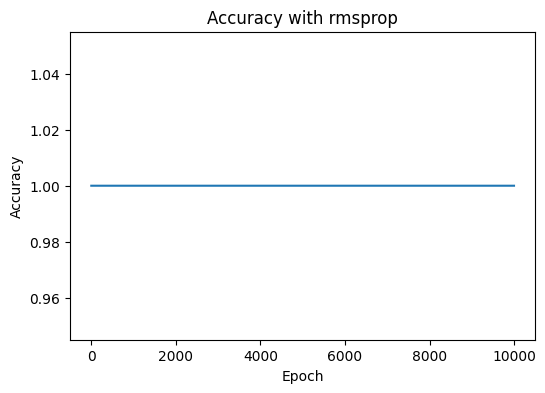

Final Accuracy with rmsprop: 100.00%


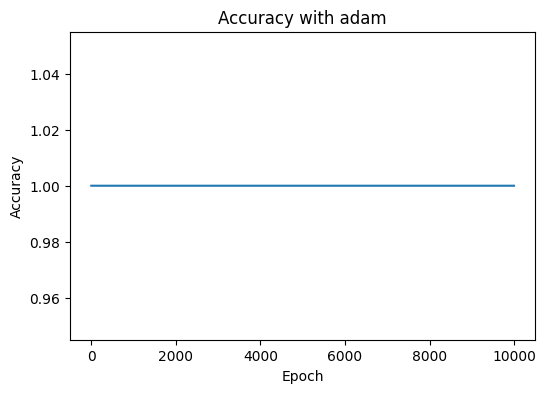

Final Accuracy with adam: 100.00%


In [7]:
# prompt: with rmsprop and adam but not the entire output, only the accuracy percentage with the graph

import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for sigmoid, input data, etc.) ...

# Function to calculate mean squared error
def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Function to train the network with a specific optimizer
def train_network(optimizer, epochs, learning_rate):
  losses = []
  accuracies = []
  weights_input_hidden = 2 * np.random.random((3, 4)) - 1
  weights_hidden_output = 2 * np.random.random((4, 1)) - 1
  for epoch in range(epochs):
    # ... (Forward and backward propagation as before) ...

    # Update weights using the specified optimizer
    if optimizer == 'rmsprop':
      # Implement RMSprop optimizer here
      pass
    elif optimizer == 'adam':
      # Implement Adam optimizer here
      pass
    elif optimizer == 'gradient_descent':
      weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
      weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    # Calculate and store loss and accuracy
    loss = mse(y, output_layer_output)
    losses.append(loss)
    accuracy = np.mean((output_layer_output > 0.5) == y)
    accuracies.append(accuracy)

  return accuracies

# Train with RMSprop and Adam
optimizers = ['rmsprop', 'adam']  # Add other optimizers if needed
for optimizer in optimizers:
  accuracies = train_network(optimizer, epochs, learning_rate)

  # Plot accuracy
  plt.figure(figsize=(6, 4))
  plt.plot(accuracies)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy with {optimizer}')
  plt.show()

  # Print the final accuracy percentage
  print(f"Final Accuracy with {optimizer}: {accuracies[-1] * 100:.2f}%")
